# Group Assignment #2: Census Data Exploration

## Download Cenus Data
Today, I'll be using the following census data set: <br>
<br>
American Community Survey 2015-2019 <br>
Table B15003: Educational Attainment for the Population 25 Years and Over <br>
Summary Level: State <br>
<br>
I downloaded the dataset from censusreporter.org as a GeoJSON file

## Initialize Workspace

### Load Libraries

In [1]:
# for working with data
import pandas as pd

# for working with spatial data
import geopandas as gpd

# for cooler plots
import matplotlib.pyplot as plt


### Load Data

In [2]:
# upload data as "acs" variable
acs = gpd.read_file("data/acs_educ.geojson")

## Explore Data

Let's look at the size of the dataset

In [3]:
# size of dataset
acs.shape

(51, 53)

There are 51 rows and 53 columns. This means the dataset includes all states, plus Washington, DC. <br>

Let's look at the data directly. 

In [6]:
acs.head(5)

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
0,04000US01,Alabama,3360058.0,5792.0,39664.0,3913.0,213.0,291.0,528.0,370.0,...,9416.0,547975.0,14065.0,246772.0,8364.0,52179.0,4044.0,38431.0,3318.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,484058.0,2581.0,2291.0,763.0,203.0,195.0,101.0,85.0,...,3004.0,89583.0,4612.0,38960.0,3004.0,10924.0,1800.0,6690.0,1335.0,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,4944540.0,3175.0,76249.0,5908.0,1037.0,557.0,2187.0,1162.0,...,12312.0,931038.0,13830.0,404500.0,10811.0,89342.0,4582.0,67278.0,3753.0,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,2036456.0,4918.0,26937.0,3032.0,291.0,203.0,265.0,230.0,...,6906.0,307185.0,9490.0,121947.0,6129.0,27975.0,2318.0,18260.0,2531.0,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,26937872.0,5782.0,727316.0,17298.0,7954.0,1422.0,10659.0,1971.0,...,25012.0,5889724.0,34186.0,2400918.0,23668.0,672307.0,13762.0,465535.0,9758.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


All of the column names can't be displayed here, so let's look at all of them.

In [7]:
list(acs)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

Finally, let's get an idea of what class of data we're working with.

In [8]:
acs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             51 non-null     object  
 1   name              51 non-null     object  
 2   B15003001         51 non-null     float64 
 3   B15003001, Error  51 non-null     float64 
 4   B15003002         51 non-null     float64 
 5   B15003002, Error  51 non-null     float64 
 6   B15003003         51 non-null     float64 
 7   B15003003, Error  51 non-null     float64 
 8   B15003004         51 non-null     float64 
 9   B15003004, Error  51 non-null     float64 
 10  B15003005         51 non-null     float64 
 11  B15003005, Error  51 non-null     float64 
 12  B15003006         51 non-null     float64 
 13  B15003006, Error  51 non-null     float64 
 14  B15003007         51 non-null     float64 
 15  B15003007, Error  51 non-null     float64 
 16  B15003008         51

Looks like most of the data are floats, except for the geoid, name, and geometry fields.

## Clean Data
Let's clean up the data so it is usable for analysis. 

### Remove Extra Columns
Get rid of the "Error" columns to clean data

In [9]:
# List all the columns agains
list(acs)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [10]:
# Copy and paste existing column names and delete extraneous column names
# Save as the variable "cols"
# Note: I used the multiple cursors as fun short cut! 
cols = ['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

In [11]:
# Redefine 'acs' with only wanted columns
acs = acs[cols]

In [12]:
# Check that only desired columns remain
acs.head(1)

,geoid,name,B15003001,B15003002,B15003003,B15003004,B15003005,B15003006,B15003007,B15003008,...,B15003017,B15003018,B15003019,B15003020,B15003021,B15003022,B15003023,B15003024,B15003025,geometry
0,04000US01,Alabama,3360058.0,39664.0,213.0,528.0,1126.0,1396.0,4937.0,3388.0,...,862665.0,176576.0,213757.0,486716.0,301914.0,547975.0,246772.0,52179.0,38431.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."


### Rename Columns
Rename the columns from current jargon form to an easier name using the metadata json file.

In [13]:
# print existing columns to copy and paste and then rename
list(acs)

['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

In [14]:
# rename columns to desired name
acs.columns = ['geoid',
 'State',
 'Total',
 'No Schooling Completed',
 'Nursery School',
 'Kindergarten',
 '1st Grade',
 '2nd Grade',
 '3rd Grade',
 '4th Grade',
 '5th Grade',
 '6th Grade',
 '7th Grade',
 '8th Grade',
 '9th Grade',
 '10th Grade',
 '11th Grade',
 '12th Grade, No Diploma',
 'Regular High School Diploma',
 'GED or Alternative Credential',
 'Some College, Less than 1 Year',
 'Some College, 1 or More Years, No Degree',
 'Associate Degree',
 'Bachelor Degree',
 'Master Degree',
 'Professional School Degree',
 'Doctorate Degree',
 'geometry']

In [15]:
# check
acs.head(1)

,geoid,State,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,...,Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 Year","Some College, 1 or More Years, No Degree",Associate Degree,Bachelor Degree,Master Degree,Professional School Degree,Doctorate Degree,geometry
0,04000US01,Alabama,3360058.0,39664.0,213.0,528.0,1126.0,1396.0,4937.0,3388.0,...,862665.0,176576.0,213757.0,486716.0,301914.0,547975.0,246772.0,52179.0,38431.0,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."


### Transform totals to percents
I'm not interested in raw totals of respondants but rather in the percentages. 
This step replaces the totals columns with percentages.

In [16]:
list(acs)

['geoid',
 'State',
 'Total',
 'No Schooling Completed',
 'Nursery School',
 'Kindergarten',
 '1st Grade',
 '2nd Grade',
 '3rd Grade',
 '4th Grade',
 '5th Grade',
 '6th Grade',
 '7th Grade',
 '8th Grade',
 '9th Grade',
 '10th Grade',
 '11th Grade',
 '12th Grade, No Diploma',
 'Regular High School Diploma',
 'GED or Alternative Credential',
 'Some College, Less than 1 Year',
 'Some College, 1 or More Years, No Degree',
 'Associate Degree',
 'Bachelor Degree',
 'Master Degree',
 'Professional School Degree',
 'Doctorate Degree',
 'geometry']

In [17]:
# Create a new column that is the percentage for each level of schooling
acs['No Schooling Completed'] = (acs['No Schooling Completed']/acs['Total'])*100
acs['Nursery School'] = (acs['Nursery School']/acs['Total'])*100
acs['Kindergarten'] = (acs['Kindergarten']/acs['Total'])*100
acs['1st Grade'] = (acs['1st Grade']/acs['Total'])*100
acs['2nd Grade'] = (acs['2nd Grade']/acs['Total'])*100
acs['3rd Grade'] = (acs['3rd Grade']/acs['Total'])*100
acs['4th Grade'] = (acs['4th Grade']/acs['Total'])*100
acs['5th Grade'] = (acs['5th Grade']/acs['Total'])*100
acs['6th Grade'] = (acs['6th Grade']/acs['Total'])*100
acs['7th Grade'] = (acs['7th Grade']/acs['Total'])*100
acs['8th Grade'] = (acs['8th Grade']/acs['Total'])*100
acs['9th Grade'] = (acs['9th Grade']/acs['Total'])*100
acs['10th Grade'] = (acs['10th Grade']/acs['Total'])*100
acs['11th Grade'] = (acs['11th Grade']/acs['Total'])*100
acs['12th Grade, No Diploma'] = (acs['12th Grade, No Diploma']/acs['Total'])*100
acs['Regular High School Diploma'] = (acs['Regular High School Diploma']/acs['Total'])*100
acs['GED or Alternative Credential'] = (acs['GED or Alternative Credential']/acs['Total'])*100
acs['Some College, Less than 1 Year'] = (acs['Some College, Less than 1 Year']/acs['Total'])*100
acs['Some College, 1 or More Years, No Degree'] = (acs['Some College, 1 or More Years, No Degree']/acs['Total'])*100
acs['Associate Degree'] = (acs['Associate Degree']/acs['Total'])*100
acs['Bachelor Degree'] = (acs['Bachelor Degree']/acs['Total'])*100
acs['Master Degree'] = (acs['Master Degree']/acs['Total'])*100
acs['Professional School Degree'] = (acs['Professional School Degree']/acs['Total'])*100
acs['Doctorate Degree'] = (acs['Doctorate Degree']/acs['Total'])*100


In [18]:
# check visually
acs.head(5)

,geoid,State,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,...,Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 Year","Some College, 1 or More Years, No Degree",Associate Degree,Bachelor Degree,Master Degree,Professional School Degree,Doctorate Degree,geometry
0,04000US01,Alabama,3360058.0,1.180456,0.006339,0.015714,0.033511,0.041547,0.146932,0.100832,...,25.674110,5.255147,6.361706,14.485345,8.985381,16.308498,7.344278,1.552920,1.143760,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ..."
1,04000US02,Alaska,484058.0,0.473290,0.041937,0.020865,0.110317,0.078710,0.121266,0.027683,...,23.766573,4.981221,8.016395,17.654289,8.964628,18.506667,8.048622,2.256754,1.382066,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630..."
2,04000US04,Arizona,4944540.0,1.542085,0.020973,0.044231,0.049995,0.160237,0.259478,0.127272,...,19.563559,4.112759,7.766911,17.247449,8.733957,18.829618,8.180741,1.806882,1.360652,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169..."
3,04000US05,Arkansas,2036456.0,1.322739,0.014290,0.013013,0.021213,0.059515,0.224950,0.168970,...,28.529858,6.349658,6.730958,15.074178,7.451082,15.084293,5.988197,1.373710,0.896656,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ..."
4,04000US06,California,26937872.0,2.699976,0.029527,0.039569,0.123555,0.266743,0.628691,0.381730,...,18.286560,2.304195,5.655825,14.918821,7.865477,21.864103,8.912798,2.495769,1.728180,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."


Let's double check the integrity of the dataset mathematically. To do this, I will sum up the percentages of each year of schooling for each state. They should sum to 100%

In [19]:
# use for loop and .iloc to iterate across each row
for i in range(len(acs)):
    print(sum(acs.iloc[i][3:27]))


100.00000000000001
100.0
100.00000000000001
100.0
100.0
100.0
99.99999999999999
100.0
100.0
99.99999999999999
99.99999999999999
100.00000000000001
99.99999999999999
100.0
100.00000000000001
100.0
100.0
100.0
100.00000000000001
100.0
100.0
100.00000000000001
100.0
99.99999999999999
100.0
100.0
100.0
100.0
100.0
99.99999999999999
100.0
100.0
99.99999999999999
99.99999999999999
99.99999999999999
100.0
100.0
99.99999999999999
100.0
100.0
100.00000000000001
99.99999999999999
99.99999999999999
99.99999999999999
100.00000000000001
100.0
100.0
99.99999999999999
100.0
100.00000000000001
100.0


Success! Each state is at or very close to 100%. Any discrepancies are due to rounding errors.

### Create Bins

There are still too many variables for easy analysis. I'm not that interested in how many people have a 3rd grade education, but rather how many people have less than a high school degree. I'm going to create some bins to capture a broader level of educational attainment.

In [20]:
# create new column with summation

## sum "No Schooling" through "12th Grade, no degree"
acs['Less than High School']= acs.iloc[:,3:17].sum(axis=1)

## sum "Regular High School Diploma" and "GED or Alternative Degree"
acs['High School or Equivalent'] = acs.iloc[:,18:19].sum(axis=1)

# sum "Less than 1 year of college" and "More than 1 year of college, no degree"
acs['Some College'] = acs.iloc[:,20:21].sum(axis=1)

# sum "Associate Degree" and "Professional School Degree"
acs['Associate or Professional Degree'] = acs['Associate Degree'] + acs['Professional School Degree']

In [21]:
# check
acs.head()

,geoid,State,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,...,Associate Degree,Bachelor Degree,Master Degree,Professional School Degree,Doctorate Degree,geometry,Less than High School,High School or Equivalent,Some College,Associate or Professional Degree
0,04000US01,Alabama,3360058.0,1.180456,0.006339,0.015714,0.033511,0.041547,0.146932,0.100832,...,8.985381,16.308498,7.344278,1.552920,1.143760,"MULTIPOLYGON (((-88.13999 34.58170, -88.13997 ...",10.898681,25.674110,6.361706,10.538300
1,04000US02,Alaska,484058.0,0.473290,0.041937,0.020865,0.110317,0.078710,0.121266,0.027683,...,8.964628,18.506667,8.048622,2.256754,1.382066,"MULTIPOLYGON (((-165.25416 60.91711, -165.2630...",5.548715,23.766573,8.016395,11.221383
2,04000US04,Arizona,4944540.0,1.542085,0.020973,0.044231,0.049995,0.160237,0.259478,0.127272,...,8.733957,18.829618,8.180741,1.806882,1.360652,"MULTIPOLYGON (((-114.51684 33.02789, -114.5169...",10.119526,19.563559,7.766911,10.540839
3,04000US05,Arkansas,2036456.0,1.322739,0.014290,0.013013,0.021213,0.059515,0.224950,0.168970,...,7.451082,15.084293,5.988197,1.373710,0.896656,"MULTIPOLYGON (((-94.55217 36.10213, -94.55250 ...",10.768168,28.529858,6.730958,8.824792
4,04000US06,California,26937872.0,2.699976,0.029527,0.039569,0.123555,0.266743,0.628691,0.381730,...,7.865477,21.864103,8.912798,2.495769,1.728180,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378...",13.349718,18.286560,5.655825,10.361245


To simplify analysis, I will create a "clean" acs variable called acs_c. This will contain only the bins I am interested in analyzing.

In [22]:
# create new variable with subset
acs_c = acs[['geoid',
 'State',
 'Less than High School',
 'High School or Equivalent',
 'Some College',
 'Associate or Professional Degree',
 'Bachelor Degree',
 'Master Degree',
 'Doctorate Degree',
 'geometry']].copy()


In [23]:
# check
list(acs_c)

['geoid',
 'State',
 'Less than High School',
 'High School or Equivalent',
 'Some College',
 'Associate or Professional Degree',
 'Bachelor Degree',
 'Master Degree',
 'Doctorate Degree',
 'geometry']

## Visualize Data
Since the dataset is a GeoJSON file, it will be easy to plot spatially. <br>
<br>
Let's start with plotting Bachelors Degrees to test it out.

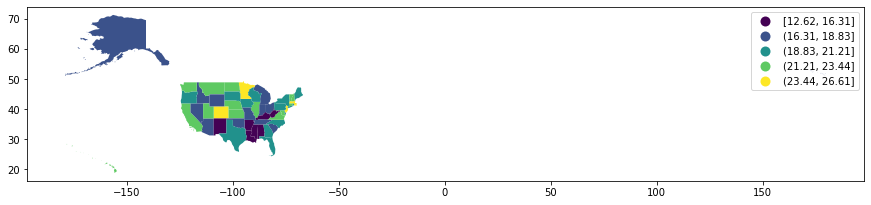

In [24]:
# 
acs_c.plot(figsize=(15,20),
                 column='Bachelor Degree',
                 legend=True, 
                 scheme='NaturalBreaks')

Right now, I'm interested in looking closer at the contiguous 48 for better presentation. However, I would like to learn how to create subset plots for Alaska and Hawaii in the future! <br>

For now, I'm going to remove Alaska and Hawaii from the dataset by querying them out.

In [25]:
# Query out Alaska and Hawaii
acs_c = acs_c.query("State != 'Alaska' & State !='Hawaii'")


Now I'll make the plots again. This time, I'll do a subplots to look at High School Education Attainment and Bachelor's Degree attainment.

Text(0.5, 1.0, "Percent of Population that Completed Bachelor's Degree")

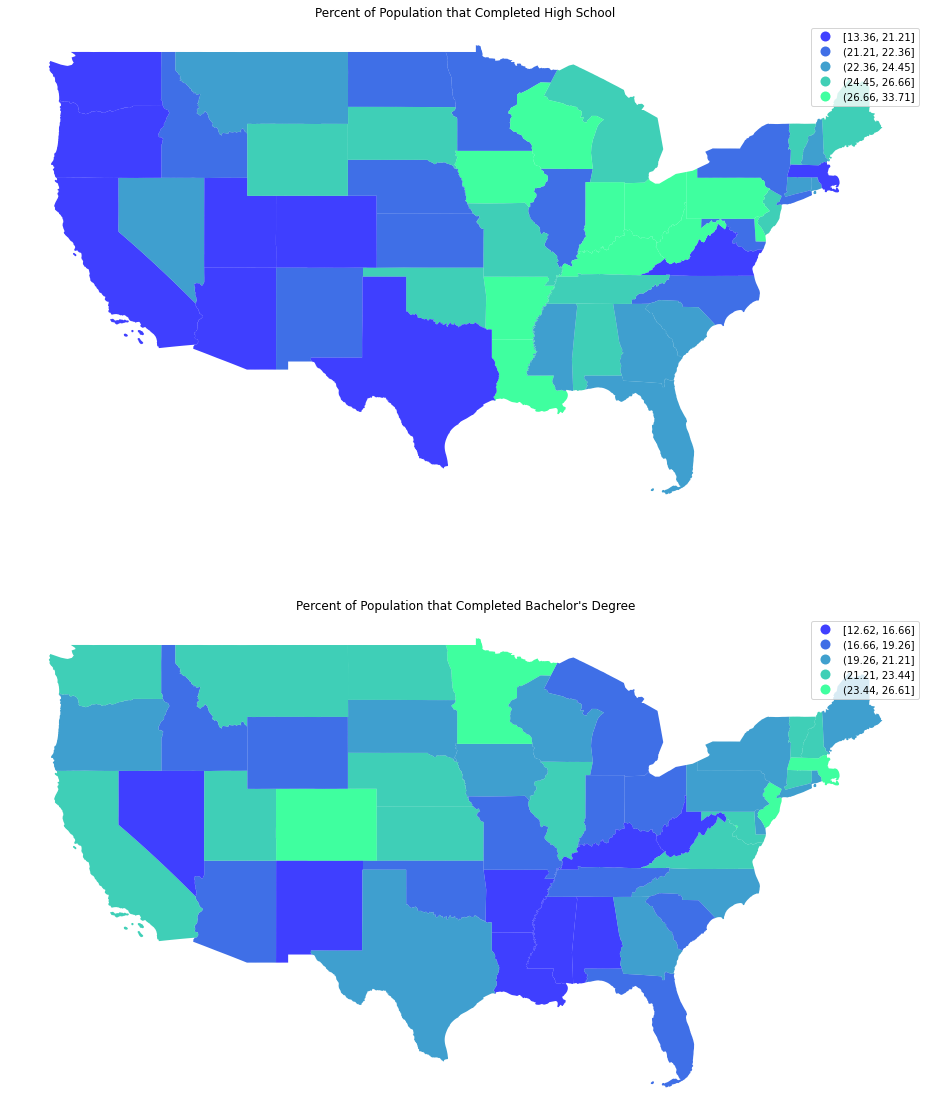

In [26]:
# create the subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# name subplots
ax1, ax2 = axs

# plot 1
acs_c.plot(column='High School or Equivalent',
            cmap='winter', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent of Population that Completed High School")

# plot 2
acs_c.plot(column= 'Bachelor Degree', 
            cmap='winter', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent of Population that Completed Bachelor's Degree")


Viola! In the future, I would like to learn how to format the legend to display more information.

# Group Members
Lauren Harper: ACS analysis of level of education by state<br>
Nataly Rios: ACS analysis of race by state